# Working With Dates in Pandas

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

## Create your own date

In [2]:
from datetime import datetime


In [3]:
#calculate now
datetime.now()

datetime.datetime(2022, 9, 21, 15, 51, 43, 353404)

In [4]:
#calculate now
today = datetime.now()

In [5]:
#display datatype
type(today)

datetime.datetime

In [6]:
#manually set date with (year, month, day)

datetime(month= 9, year = 1981, day = 15)

datetime.datetime(1981, 9, 15, 0, 0)

In [7]:
#display datatype
datetime.now() - pd.Timestamp(year=1981, day=17, month=6, hour=12, minute=27)

Timedelta('15071 days 03:24:44.705737')

## Transform to date format

### One date

In [8]:
date = 'Jan 1 1970'

In [9]:
#display datatype
type(date)

str

In [10]:
#use pd.to_datetime() to convert
pd.to_datetime(date)

Timestamp('1970-01-01 00:00:00')

In [11]:
#display datatype


### One date, but confuse pandas

In [12]:
date = 'Jan:7:1970'

In [13]:
#display datatype
type(date)

str

In [14]:
#use pd.to_datetime() to convert
pd.to_datetime(date)

ParserError: Unknown string format: Jan:7:1970

We can fix this error using the `format` argument.

For info on formatting: https://docs.python.org/3/library/datetime.html#strftime-and-strptime-behavior

In [15]:
#use format arguement
pd.to_datetime(date, format='%b:%d:%Y')

Timestamp('1970-01-07 00:00:00')

### Now a whole columns of dates

In [16]:
url = "https://gist.githubusercontent.com/ryanorsinger/\
b309f8db19e0ca71b213d4877d835e77/raw/f5841017310e2f4ca070b313529ceec2375336ba/coffee_consumption.csv"
df = pd.read_csv(url)

In [17]:
#look at data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                261 non-null    object 
 1   coffee_consumption  261 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.2+ KB


In [18]:
#look at datatypes
df.date

0      2019-01-01
1      2019-01-02
2      2019-01-03
3      2019-01-04
4      2019-01-07
          ...    
256    2019-12-25
257    2019-12-26
258    2019-12-27
259    2019-12-30
260    2019-12-31
Name: date, Length: 261, dtype: object

In [19]:
#use pd.to_datetime() to convert
pd.to_datetime(df.date)

0     2019-01-01
1     2019-01-02
2     2019-01-03
3     2019-01-04
4     2019-01-07
         ...    
256   2019-12-25
257   2019-12-26
258   2019-12-27
259   2019-12-30
260   2019-12-31
Name: date, Length: 261, dtype: datetime64[ns]

In [20]:
#can also use .astype() to convert
df.date = df.date.astype('datetime64')

In [21]:
#look at datatypes


## Now that they are in a date format, let's manipulate them

### use `.dt` to extract pieces of the date

the documentation: https://pandas.pydata.org/docs/reference/api/pandas.DatetimeIndex.html

In [22]:
df.date.dt.year

0      2019
1      2019
2      2019
3      2019
4      2019
       ... 
256    2019
257    2019
258    2019
259    2019
260    2019
Name: date, Length: 261, dtype: int64

In [23]:
df.date.dt.month_name()

0       January
1       January
2       January
3       January
4       January
         ...   
256    December
257    December
258    December
259    December
260    December
Name: date, Length: 261, dtype: object

In [24]:
df.date.dt.day

0       1
1       2
2       3
3       4
4       7
       ..
256    25
257    26
258    27
259    30
260    31
Name: date, Length: 261, dtype: int64

### we can add them back to our initial dataframe

In [25]:
#add them all


### Reformat date using `dt.strftime()`

## Time to make it more complex!

In [26]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1kTrAFSrr-xP3REs0Lly0TdV4ekrHahBXLg9r5qKxmV8/edit#gid=0'
csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')

df = pd.read_csv(csv_export_url)
df

,Date,Symbol,Close,Volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


In [27]:
df.columns = df.columns.str.lower()

In [28]:
#lowercase columns
df

,date,symbol,close,volume
0,2020-03-13 12-PM,ETHUSD,128.71,3906590.52
1,2020-03-13 12-AM,ETHUSD,129.94,10329663.70
2,2020-03-13 11-AM,ETHUSD,119.51,3311080.29
3,2020-03-13 10-AM,ETHUSD,124.47,3483436.48
4,2020-03-13 09-AM,ETHUSD,124.08,2767584.44
...,...,...,...,...
23669,2017-07-01 05-PM,ETHUSD,272.57,1894983.33
23670,2017-07-01 04-PM,ETHUSD,265.74,1287300.75
23671,2017-07-01 03-PM,ETHUSD,268.79,1500282.55
23672,2017-07-01 02-PM,ETHUSD,274.83,1702536.85


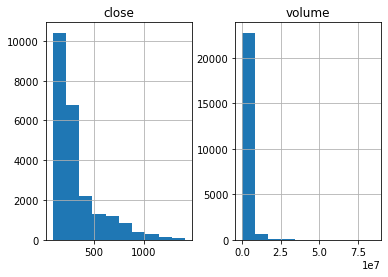

In [29]:
df.hist()
plt.show()

#### let's plot the our close value

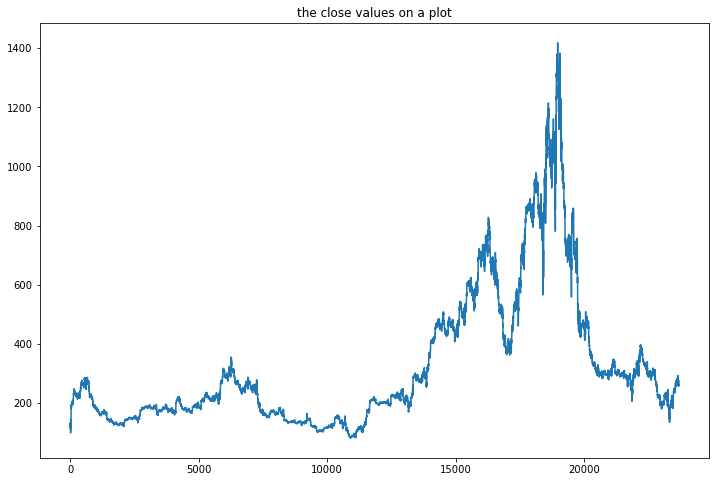

In [30]:
plt.figure(figsize=(12,8))

df.close.plot()

plt.title('the close values on a plot')
plt.show()

> when we plot a single series using .plot(), the x-axis is the index value

## How do we make pandas time aware for time analysis?

1. Convert 'date/time' column to datetime object in Pandas (pd.to_datetime())
2. Set the datetime column as index
3. Sort the datetime index

### 1. Convert to datetime

In [31]:
pd.to_datetime(df.date, format= '%Y-%m-%d %I-%p')

0       2020-03-13 12:00:00
1       2020-03-13 00:00:00
2       2020-03-13 11:00:00
3       2020-03-13 10:00:00
4       2020-03-13 09:00:00
                ...        
23669   2017-07-01 17:00:00
23670   2017-07-01 16:00:00
23671   2017-07-01 15:00:00
23672   2017-07-01 14:00:00
23673   2017-07-01 13:00:00
Name: date, Length: 23674, dtype: datetime64[ns]

In [32]:
df.date = pd.to_datetime(df.date, format= '%Y-%m-%d %I-%p')

In [33]:
df.date.dt.hour.describe()

count    23674.00000
mean        11.50169
std          6.92161
min          0.00000
25%          6.00000
50%         12.00000
75%         17.75000
max         23.00000
Name: date, dtype: float64

> format argument allows us to tell pandas the makeup of our date, so it can be understood

### 2. Set the datetime column as Index

In [34]:
df = df.set_index('date')

In [35]:
df

,symbol,close,volume
date,,,
2020-03-13 12:00:00,ETHUSD,128.71,3906590.52
2020-03-13 00:00:00,ETHUSD,129.94,10329663.70
2020-03-13 11:00:00,ETHUSD,119.51,3311080.29
2020-03-13 10:00:00,ETHUSD,124.47,3483436.48
2020-03-13 09:00:00,ETHUSD,124.08,2767584.44
...,...,...,...
2017-07-01 17:00:00,ETHUSD,272.57,1894983.33
2017-07-01 16:00:00,ETHUSD,265.74,1287300.75
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55


### 3. Sort the datetime index

In [36]:
df = df.sort_index()

#### Now let's plot it again!

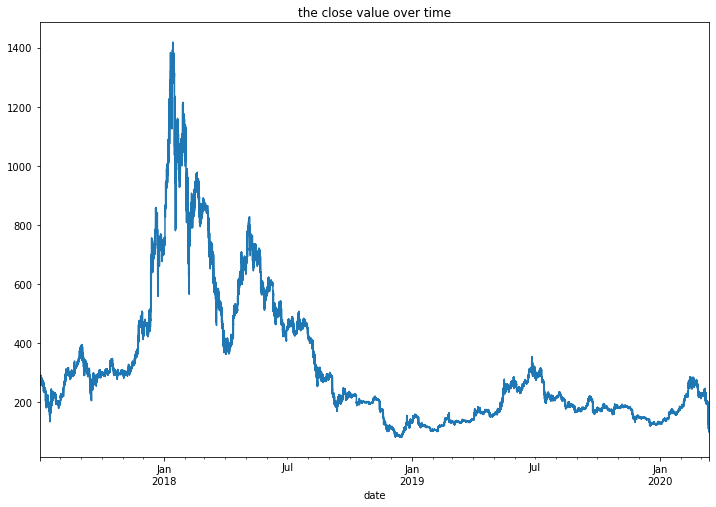

In [37]:
plt.figure(figsize=(12,8))

df.close.plot()

plt.title('the close value over time')
plt.show()

## Let's look at the the mean close value on each day of the week

In [38]:
df

,symbol,close,volume
date,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87
2017-07-01 12:00:00,ETHUSD,263.12,824362.87
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55
...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81


In [39]:
#pull out weekday name & save


In [40]:
df.index.day_name()

Index(['Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday', 'Saturday',
       'Saturday', 'Saturday', 'Saturday', 'Saturday',
       ...
       'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday', 'Friday',
       'Friday', 'Friday', 'Friday'],
      dtype='object', name='date', length=23674)

In [41]:
df['weekday'] = df.index.day_name()

In [42]:
df

,symbol,close,volume,weekday
date,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday
...,...,...,...,...
2020-03-13 16:00:00,ETHUSD,127.57,4461424.71,Friday
2020-03-13 17:00:00,ETHUSD,133.80,2753450.92,Friday
2020-03-13 18:00:00,ETHUSD,128.93,4898735.81,Friday


In [43]:
df.groupby('weekday').agg('mean')

,close,volume
weekday,,
Friday,321.134596,2.135718e+06
Monday,326.186823,1.913387e+06
Saturday,327.707441,1.455576e+06
Sunday,326.316418,1.453492e+06
Thursday,323.334524,2.250669e+06
Tuesday,325.189722,2.355955e+06
Wednesday,324.622361,2.510756e+06


#### let's plot it!

In [44]:
# plt.figure(figsize=(10,6))


# plt.title('the mean close value each day of the week')
# plt.show()

### But Misty, I don't like that the days aren't in order

In [45]:
#use dayofweek attribute
df.index.day_of_week

Int64Index([5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='date', length=23674)

In [46]:
df['weekday_number'] = df.index.day_of_week

<AxesSubplot:xlabel='weekday'>

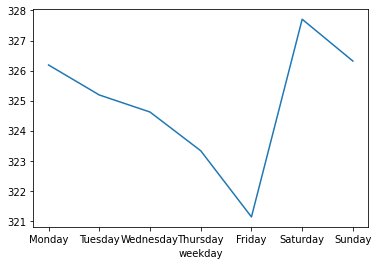

In [47]:
df.groupby('weekday').mean().sort_values('weekday_number').close.plot()

#### let's plot it better this time!

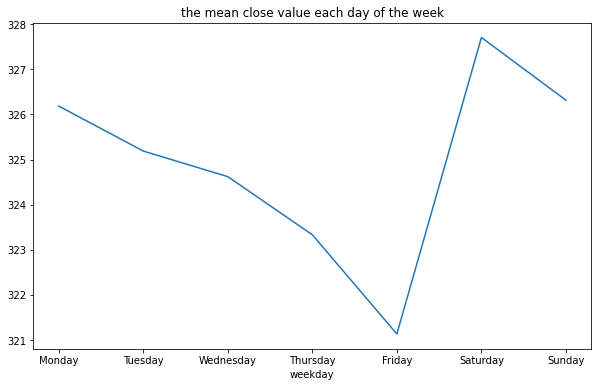

In [48]:
plt.figure(figsize=(10,6))

df.groupby('weekday').mean().sort_values('weekday_number').close.plot()

plt.title('the mean close value each day of the week')
plt.show()

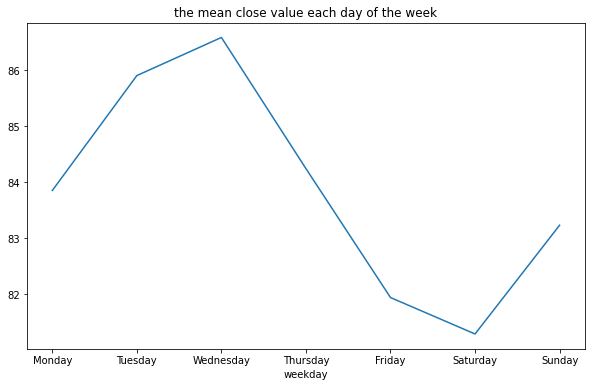

In [49]:
plt.figure(figsize=(10,6))

df.groupby('weekday').min().sort_values('weekday_number').close.plot()

plt.title('the mean close value each day of the week')
plt.show()

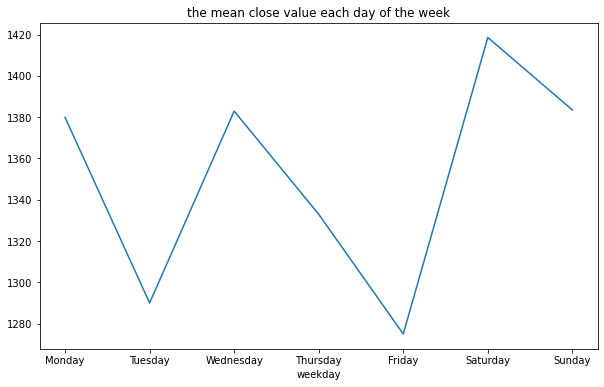

In [50]:
plt.figure(figsize=(10,6))

df.groupby('weekday').max().sort_values('weekday_number').close.plot()

plt.title('the mean close value each day of the week')
plt.show()

## How do we get a subset of the dataframe?

In [51]:
#one yall already know 


In [52]:
#single .loc value
df.loc['2017-11-21 19:00:00']

symbol                ETHUSD
close                 368.91
volume            3434163.09
weekday              Tuesday
weekday_number             1
Name: 2017-11-21 19:00:00, dtype: object

> `.loc` lets you send an index value and then it will give you the corresponding rows

In [53]:
#range of .loc values
df.loc['2017-07':'2017-09']

,symbol,close,volume,weekday,weekday_number
date,,,,,
2017-07-01 11:00:00,ETHUSD,257.13,679358.87,Saturday,5
2017-07-01 12:00:00,ETHUSD,263.12,824362.87,Saturday,5
2017-07-01 13:00:00,ETHUSD,275.01,3010787.99,Saturday,5
2017-07-01 14:00:00,ETHUSD,274.83,1702536.85,Saturday,5
2017-07-01 15:00:00,ETHUSD,268.79,1500282.55,Saturday,5
...,...,...,...,...,...
2017-09-30 19:00:00,ETHUSD,302.79,301850.54,Saturday,5
2017-09-30 20:00:00,ETHUSD,302.97,737006.90,Saturday,5
2017-09-30 21:00:00,ETHUSD,300.10,1407368.63,Saturday,5


In [54]:
#using .loc for one year
df.loc['2018']

,symbol,close,volume,weekday,weekday_number
date,,,,,
2018-01-01 00:00:00,ETHUSD,754.42,2697546.48,Monday,0
2018-01-01 01:00:00,ETHUSD,734.59,1886624.01,Monday,0
2018-01-01 02:00:00,ETHUSD,730.01,2950627.37,Monday,0
2018-01-01 03:00:00,ETHUSD,747.90,3461348.11,Monday,0
2018-01-01 04:00:00,ETHUSD,757.86,3180304.69,Monday,0
...,...,...,...,...,...
2018-12-31 19:00:00,ETHUSD,135.41,3380282.07,Monday,0
2018-12-31 20:00:00,ETHUSD,135.99,1775465.69,Monday,0
2018-12-31 21:00:00,ETHUSD,135.01,1079617.65,Monday,0


In [55]:
df.iloc[12:21]

,symbol,close,volume,weekday,weekday_number
date,,,,,
2017-07-01 23:00:00,ETHUSD,263.84,1902503.11,Saturday,5
2017-07-02 00:00:00,ETHUSD,286.00,1323285.21,Sunday,6
2017-07-02 01:00:00,ETHUSD,259.90,956362.19,Sunday,6
2017-07-02 02:00:00,ETHUSD,257.02,1335138.27,Sunday,6
2017-07-02 03:00:00,ETHUSD,257.84,596059.44,Sunday,6
2017-07-02 04:00:00,ETHUSD,260.88,771738.33,Sunday,6
2017-07-02 05:00:00,ETHUSD,274.00,1746145.00,Sunday,6
2017-07-02 06:00:00,ETHUSD,263.37,590248.89,Sunday,6
2017-07-02 07:00:00,ETHUSD,265.89,983053.30,Sunday,6


## What if we want a different period of data?

In [56]:
#drop extra columns
df1 = df
df = df[['close']]

### Downsampling: reduce frequency

use `asfreq` to change the period

In [57]:
#set frequency to daily
df.asfreq('D')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-02 11:00:00,282.30
2017-07-03 11:00:00,279.50
2017-07-04 11:00:00,269.57
2017-07-05 11:00:00,265.20
...,...
2020-03-09 11:00:00,198.34
2020-03-10 11:00:00,203.12
2020-03-11 11:00:00,193.37


In [58]:
#set frequency to monthly
df.asfreq('M')

,close
date,
2017-07-31 11:00:00,199.96
2017-08-31 11:00:00,388.19
2017-09-30 11:00:00,300.37
2017-10-31 11:00:00,303.45
2017-11-30 11:00:00,420.42
2017-12-31 11:00:00,750.11
2018-01-31 11:00:00,1090.00
2018-02-28 11:00:00,869.62
2018-03-31 11:00:00,394.53


#### let's plot it by month!

In [59]:
# plt.figure(figsize=(10,8))

# plt.title('close resampled by month')
# plt.show()

#### What if I want the first day of the month?

[Pandas asfreq Offset Aliases](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases)

[Pandas asfreq Anchored Offsets](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#anchored-offsets)

In [60]:
#set to first day of the month
df.asfreq('MS')

,close
date,
2017-07-01 11:00:00,257.13
2017-08-01 11:00:00,228.84
2017-09-01 11:00:00,391.83
2017-10-01 11:00:00,300.76
2017-11-01 11:00:00,289.15
2017-12-01 11:00:00,465.79
2018-01-01 11:00:00,755.00
2018-02-01 11:00:00,1013.98
2018-03-01 11:00:00,875.99


#### let's plot it!

<Figure size 1008x720 with 0 Axes>

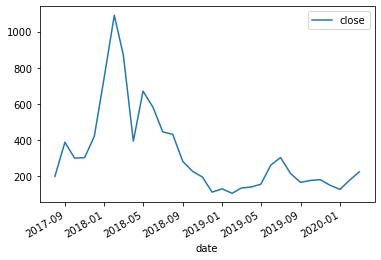

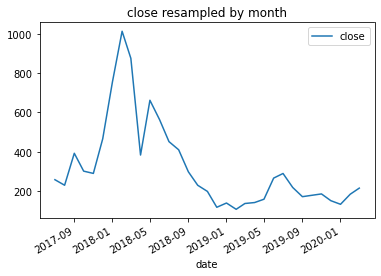

In [61]:
plt.figure(figsize=(14,10))

df.asfreq('M').plot()
df.asfreq('MS').plot()

plt.title('close resampled by month')
plt.legend()
plt.show()

### Upsampling: Increase frequency

In [62]:
df.asfreq('T')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:01:00,NaN
2017-07-01 11:02:00,NaN
2017-07-01 11:03:00,NaN
2017-07-01 11:04:00,NaN
...,...
2020-03-13 19:56:00,NaN
2020-03-13 19:57:00,NaN
2020-03-13 19:58:00,NaN


In [63]:
#set frequency to minutes


> generates null for values we don't have, but we can fill them!

In [64]:
#use ffill method
df.asfreq('30T', method='ffill')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,257.13
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,263.12
2017-07-01 13:00:00,275.01
...,...
2020-03-13 18:00:00,128.93
2020-03-13 18:30:00,128.93
2020-03-13 19:00:00,134.03


In [65]:
# use bfill method
df.asfreq('30T', method='bfill')

,close
date,
2017-07-01 11:00:00,257.13
2017-07-01 11:30:00,263.12
2017-07-01 12:00:00,263.12
2017-07-01 12:30:00,275.01
2017-07-01 13:00:00,275.01
...,...
2020-03-13 18:00:00,128.93
2020-03-13 18:30:00,134.03
2020-03-13 19:00:00,134.03


### Resampling - Aggregating over time

In [66]:
#get the daily mean
df.resample('D').mean()

,close
date,
2017-07-01,265.284615
2017-07-02,269.782500
2017-07-03,278.882083
2017-07-04,276.743333
2017-07-05,265.025833
...,...
2020-03-09,200.818333
2020-03-10,201.577500
2020-03-11,195.910417


In [67]:
#get the daily mean
df.resample('D').agg(['mean', 'min', 'max'])

close                
                  mean     min     max
date                                  
2017-07-01  265.284615  257.13  275.01
2017-07-02  269.782500  256.81  292.54
2017-07-03  278.882083  274.89  282.36
2017-07-04  276.743333  268.95  282.58
2017-07-05  265.025833  255.42  271.00
...                ...     ...     ...
2020-03-09  200.818333  193.26  207.79
2020-03-10  201.577500  196.55  205.79
2020-03-11  195.910417  184.25  202.48
2020-03-12  152.763333  110.30  193.44
2020-03-13  124.060476   98.88  134.03

[987 rows x 3 columns]

#### let's plot it!

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


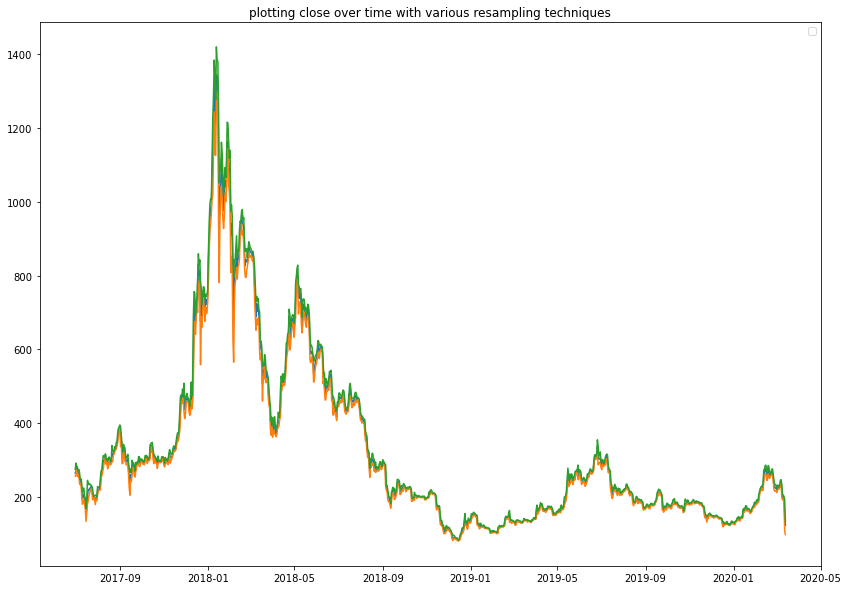

In [68]:
plt.figure(figsize=(14,10))

plt.plot(df.resample('D').agg(['mean', 'min', 'max']), aa=True, animated= True)

plt.title('plotting close over time with various resampling techniques')
plt.legend()


plt.show()

In [69]:
import plotly.express as px

In [70]:
# df.columns = 
df.resample('D').agg(['mean', 'min', 'max']).columns.to_flat_index()

Index([('close', 'mean'), ('close', 'min'), ('close', 'max')], dtype='object')

In [71]:
# df.columns = 
df_agg = df.resample('D').agg(['mean', 'min', 'max'])
df_agg

close                
                  mean     min     max
date                                  
2017-07-01  265.284615  257.13  275.01
2017-07-02  269.782500  256.81  292.54
2017-07-03  278.882083  274.89  282.36
2017-07-04  276.743333  268.95  282.58
2017-07-05  265.025833  255.42  271.00
...                ...     ...     ...
2020-03-09  200.818333  193.26  207.79
2020-03-10  201.577500  196.55  205.79
2020-03-11  195.910417  184.25  202.48
2020-03-12  152.763333  110.30  193.44
2020-03-13  124.060476   98.88  134.03

[987 rows x 3 columns]

In [75]:
df_agg

close                
                  mean     min     max
date                                  
2017-07-01  265.284615  257.13  275.01
2017-07-02  269.782500  256.81  292.54
2017-07-03  278.882083  274.89  282.36
2017-07-04  276.743333  268.95  282.58
2017-07-05  265.025833  255.42  271.00
...                ...     ...     ...
2020-03-09  200.818333  193.26  207.79
2020-03-10  201.577500  196.55  205.79
2020-03-11  195.910417  184.25  202.48
2020-03-12  152.763333  110.30  193.44
2020-03-13  124.060476   98.88  134.03

[987 rows x 3 columns]

In [77]:
pd.DataFrame(df_agg.to_records())

,date,"('close', 'mean')","('close', 'min')","('close', 'max')"
0,2017-07-01,265.284615,257.13,275.01
1,2017-07-02,269.782500,256.81,292.54
2,2017-07-03,278.882083,274.89,282.36
3,2017-07-04,276.743333,268.95,282.58
4,2017-07-05,265.025833,255.42,271.00
...,...,...,...,...
982,2020-03-09,200.818333,193.26,207.79
983,2020-03-10,201.577500,196.55,205.79
984,2020-03-11,195.910417,184.25,202.48
985,2020-03-12,152.763333,110.30,193.44


In [73]:
from formating import flat

In [74]:
flat(df_agg, 'close')

KeyError: 'Requested level (close) does not match index name (date)'

In [103]:
df_flat = df_agg
df_flat.columns = df_flat.columns.to_flat_index()
df_flat

# df_flat = df.resample('D').agg(['mean', 'min', 'max']).columns.to_flat_index()

,close_mean,close_min,close_max
date,,,
2017-07-01,265.284615,257.13,275.01
2017-07-02,269.782500,256.81,292.54
2017-07-03,278.882083,274.89,282.36
2017-07-04,276.743333,268.95,282.58
2017-07-05,265.025833,255.42,271.00
...,...,...,...
2020-03-09,200.818333,193.26,207.79
2020-03-10,201.577500,196.55,205.79
2020-03-11,195.910417,184.25,202.48


In [102]:
df_flat

,close_mean,close_min,close_max
date,,,
2017-07-01,265.284615,257.13,275.01
2017-07-02,269.782500,256.81,292.54
2017-07-03,278.882083,274.89,282.36
2017-07-04,276.743333,268.95,282.58
2017-07-05,265.025833,255.42,271.00
...,...,...,...
2020-03-09,200.818333,193.26,207.79
2020-03-10,201.577500,196.55,205.79
2020-03-11,195.910417,184.25,202.48


In [101]:
df_flat_cat = df_flat
df_flat_cat.columns = ['_'.join(col) for col in df_flat_cat.columns]

df_flat_cat

,close_mean,close_min,close_max
date,,,
2017-07-01,265.284615,257.13,275.01
2017-07-02,269.782500,256.81,292.54
2017-07-03,278.882083,274.89,282.36
2017-07-04,276.743333,268.95,282.58
2017-07-05,265.025833,255.42,271.00
...,...,...,...
2020-03-09,200.818333,193.26,207.79
2020-03-10,201.577500,196.55,205.79
2020-03-11,195.910417,184.25,202.48


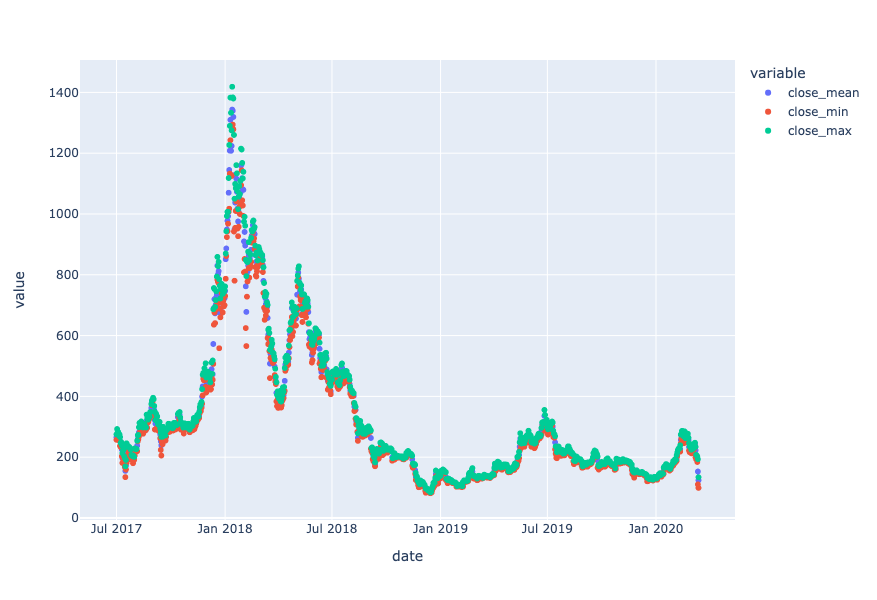

In [106]:
px.scatter(data_frame=df_flat_cat
          ,height= 600
          ,width= 800)

### Rolling averages

- Generally used to smooth out short-term fluctuations in time series data and highlight long-term trends
- use `rolling()` to calculate

In [107]:
#define df resampled daily with the mean
df_daily = df.resample('D').agg(['mean','min','max'])

In [108]:
#use the rolling function
df_daily.rolling(5).mean().head(10)

close                  
                  mean      min      max
date                                    
2017-07-01         NaN      NaN      NaN
2017-07-02         NaN      NaN      NaN
2017-07-03         NaN      NaN      NaN
2017-07-04         NaN      NaN      NaN
2017-07-05  271.143673  262.640  280.698
2017-07-06  271.382750  263.654  280.696
2017-07-07  268.214667  259.690  275.430
2017-07-08  260.747833  251.402  268.302
2017-07-09  254.361833  245.374  261.722
2017-07-10  246.440417  234.862  255.216

> the rolling average is the previous number of units averaged together  
> in this example, the rolling average on 2017-07-05 is the average of 2017-07-01 - 2017-07-05

#### let's plot it!

In [112]:
plt.figure(figsize=(12,8))

#original granularity
df_daily.(close,mean).plot()

# resample by week and look at 4 weeks 
df_daily.close.mean.resample('W').plot()

# resample by week and look at 12 weeks 
df_daily.close.mean.resample('M').plot()

plt.legend()
plt.title('original vs rolling averages')
plt.show()

SyntaxError: invalid syntax (574162311.py, line 4)

### How about Lagging or Leading the data?

* `.shift`: move the data backwards and forwards by a given amount
* `.diff`: find the difference with the previous observation (or a specified further back observation)

In [114]:
#shift by one
df_daily.shift(2)

close                
                  mean     min     max
date                                  
2017-07-01         NaN     NaN     NaN
2017-07-02         NaN     NaN     NaN
2017-07-03  265.284615  257.13  275.01
2017-07-04  269.782500  256.81  292.54
2017-07-05  278.882083  274.89  282.36
...                ...     ...     ...
2020-03-09  242.910833  237.75  247.62
2020-03-10  222.555000  199.46  234.12
2020-03-11  200.818333  193.26  207.79
2020-03-12  201.577500  196.55  205.79
2020-03-13  195.910417  184.25  202.48

[987 rows x 3 columns]

In [113]:
#shift by negative 1
df_daily.shift(-1)

close                
                  mean     min     max
date                                  
2017-07-01  269.782500  256.81  292.54
2017-07-02  278.882083  274.89  282.36
2017-07-03  276.743333  268.95  282.58
2017-07-04  265.025833  255.42  271.00
2017-07-05  266.480000  262.20  275.00
...                ...     ...     ...
2020-03-09  201.577500  196.55  205.79
2020-03-10  195.910417  184.25  202.48
2020-03-11  152.763333  110.30  193.44
2020-03-12  124.060476   98.88  134.03
2020-03-13         NaN     NaN     NaN

[987 rows x 3 columns]

In [115]:
#difference by one
df_daily.diff(3)

close              
                 mean    min    max
date                               
2017-07-01        NaN    NaN    NaN
2017-07-02        NaN    NaN    NaN
2017-07-03        NaN    NaN    NaN
2017-07-04  11.458718  11.82   7.57
2017-07-05  -4.756667  -1.39 -21.54
...               ...    ...    ...
2020-03-09 -35.444583 -34.94 -37.77
2020-03-10 -41.333333 -41.20 -41.83
2020-03-11 -26.644583 -15.21 -31.64
2020-03-12 -48.055000 -82.96 -14.35
2020-03-13 -77.517024 -97.67 -71.76

[987 rows x 3 columns]

In [ ]:
#subtract shift by one from close


## Timezones

#### use `tz_localize("UTC")` to set timezone

#### use `tz_convert` to change timezones 

In [ ]:
#convert to 'America/Chicago'


#### extract timezone

#### use .tz_localize(tz=None) to remove timezone 

## Timedelta

#### use timedelta to alter a date

In [116]:
#set todays date using datetime
today

datetime.datetime(2022, 9, 21, 11, 32, 46, 94116)

In [117]:
today - pd.Timedelta(days=2)

datetime.datetime(2022, 9, 19, 11, 32, 46, 94116)

In [121]:
#subtract using pd.Timedelta()
today - pd.Timedelta(days= 15_071)
                     

datetime.datetime(1981, 6, 17, 11, 32, 46, 94116)

In [ ]:
#add


#### subtract two dates